In [1]:
import torch
import matplotlib.pyplot as plt

epoch_step = 148 # This is the step number for one epoch with augmentated data
num_dict = {1: 206, 2: 26, 3:14}

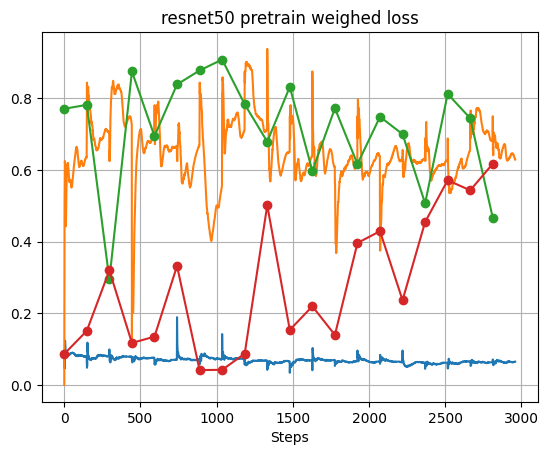

19
0.6174205432847835
{0: 0.0, 1: 0.42718446601941745, 2: 0.46153846153846156, 3: 0.7142857142857143}


In [2]:
# Draw the Results:
## mobilenet from scratch with augmentation:
hist = torch.load("/DKUdata/tangbl/courses/CS302_CV/final_project/src/scanline_traffic_object_detection/ckpt/resnet50_pretrain_weighted_loss/config/hist.pth")
x = list(range(0,len(hist['train_step'])))
step = 1
plt.plot(x[::step], [float(i['loss']) for i in hist['train_step']][::step], linestyle='-', label='loss')
plt.plot(x[::step], [float(i['accuracy']) for i in hist['train_step']][::step], linestyle='-', label='acc')

acc_w_recalculate = [i['acc_each'] for i in hist['eval_epoch']]
res = []
total_num = sum([ 1 / i for i in num_dict.values()])
weights = {k : 1 / i for k, i in num_dict.items()}
for i in acc_w_recalculate:
    avg = 0
    for k, v in num_dict.items():
        avg += weights[k] * i[k]
    avg = avg / total_num
    res.append(avg)

plt.plot(x[::epoch_step], [float(i['acc']) for i in hist['eval_epoch']], linestyle='-', marker='o', label='eval_acc')
plt.plot(x[::epoch_step], res, linestyle='-', marker = 'o', label='eval_acc_weighted')
# plt.legend()
plt.title("resnet50 pretrain weighed loss")
plt.grid(True)
plt.xlabel("Steps")
# plt.legend()
# plt.ylabel("Y-axis")
# Show the plot
plt.show()
# print(sorted([-1])
res_ = max(res)
print(res.index(res_))
print(res_)
print(hist['eval_epoch'][res.index(res_)]['acc_each'])

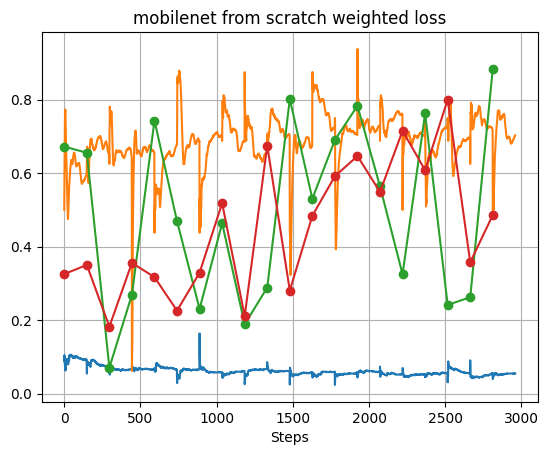

17
0.8000386184974071
{0: 0.0, 1: 0.20388349514563106, 2: 0.7692307692307693, 3: 0.8571428571428571}
{'loss': 0.10125432014465333, 'acc': 0.24166666666666667, 'acc_w': 0.7356713420019712, 'acc_each': {0: 0.0, 1: 0.20388349514563106, 2: 0.7692307692307693, 3: 0.8571428571428571}}


In [5]:
# Draw the Results:
## mobilenet from scratch with augmentation:
hist = torch.load("/DKUdata/tangbl/courses/CS302_CV/final_project/src/scanline_traffic_object_detection/ckpt/mobilenet_from_scratch_weighted_loss/config/hist.pth")
x = list(range(0,len(hist['train_step'])))
step = 1
plt.plot(x[::step], [float(i['loss']) for i in hist['train_step']][::step], linestyle='-', label='loss')
plt.plot(x[::step], [float(i['accuracy']) for i in hist['train_step']][::step], linestyle='-', label='acc')

acc_w_recalculate = [i['acc_each'] for i in hist['eval_epoch']]
res = []
total_num = sum([ 1 / i for i in num_dict.values()])
weights = {k : 1 / i for k, i in num_dict.items()}
for i in acc_w_recalculate:
    avg = 0
    for k, v in num_dict.items():
        avg += weights[k] * i[k]
    avg = avg / total_num
    res.append(avg)

plt.plot(x[::epoch_step], [float(i['acc']) for i in hist['eval_epoch']], linestyle='-', marker='o', label='eval_acc')
plt.plot(x[::epoch_step], res, linestyle='-', marker = 'o', label='eval_acc_weighted')
# plt.legend()
plt.title("mobilenet from scratch weighted loss")
plt.grid(True)
plt.xlabel("Steps")
# plt.legend()
# plt.ylabel("Y-axis")
# Show the plot
plt.show()
# print(sorted([-1])
res_ = max(res)
print(res.index(res_))
print(res_)
print(hist['eval_epoch'][res.index(res_)]['acc_each'])
print(hist['eval_epoch'][res.index(res_)])